##  A.1.3 Functions of a Complex Variable

Let's write the complex variable $z$ as

$$
z=x+i y
$$ [Eq.31]

where $x$ and $y$ are each real with each varying over the doubly-infinite interval $-\infty$ to $+\infty,$ and $i=\sqrt{-1}$. Geometrically, By interpreting $z$ as a point in an infinite, two-dimensional plane (called the complex plane) with $x$ measured along a horizontal axis and $y$ measured along a vertical axis. And considering a complex function of the complex variable $z$ as

$$
\mathrm{f}(\mathrm{z})=\mathrm{f}(\mathrm{x}+i \mathrm{y})=\mathrm{u}(\mathrm{x}, \mathrm{y})+i \mathrm{v}(\mathrm{x}, \mathrm{y})
$$ [Eq.32]

where $u$ and $v$ are each real-valued functions of the two real-valued variables $x$ and $y$. 

-----------------------------------------------------------------
> __Example__
>
> If $f(z)=z^{2}=(x+i y)^{2}=x^{2}-y^{2}+i 2 x y$ then,
>
> in this case, $u=x^{2}-y^{2}$ and $v=2 x y$. In $x, y$ notation, It is said to be working in rectangular (or Cartesian) coordinates.
-----------------------------------------------------------------

It is often convenient to work in polar coordinates, which means the complex variable $z$ is written as

$$
z=r e^{i \theta}
$$ [Eq.33]

where $r$ and $\theta$ are each real: $r$ is the radial distance from the origin of the coordinate system of the complex plane to the point $z$ (and so $0 \leq r<\infty$ ), and $\theta$ is the angle of the radius vector (of length $\mathrm{r}$ ) measured counter-clockwise from the positive horizontal x-axis to the radius vector (and so it is $0 \leq \theta<2 \pi$ usually taken). Note, carefully, however, that $\theta$ is not uniquely determined, as it could be added (or subtract) any multiple of $2 \pi$ from $\theta$ and still be talking about the same point in the complex plane.

From Euler's fabulous formula, it is obtained from [Eq.33] that

$$
z=r\{\cos (\theta)+i \sin (\theta)\}
$$ [Eq.34]

-----------------------------------------------------------------
> __Example__
>
> If $f(z)=z^{2}$ then
> 
>$$
f(z)=\left(r e^{i \theta}\right)^{2}=r^{2}\{\cos (\theta)+i \sin (\theta)\}^{2}
$$
> 
> or, expanding both sides of the last equality,
> 
>$$ 
r^{2} e^{i 2 \theta}=r^{2}\{\cos (2 \theta)+i \sin (2 \theta)\}=r^{2}\left\{\cos ^{2}(\theta)-\sin ^{2}(\theta)+i 2 \cos (\theta) \sin (\theta)\right\}
$$
> 
> since the real and imaginary parts of the expressions in the last equality must be separately equal, it is concluded that $\cos (2 \theta)=\cos ^{2}(\theta)-\sin ^{2}(\theta)$ as well as $\sin (2 \theta)= 2 \cos (\theta) \sin (\theta)$. These two formulas are the well-known double-angle formulas from trigonometry, and so already it is a nice illustration of the powerful capability of complex functions to do useful work for calculi. 
>  
> [If, instead, it has started with $f(z)=z^{3}=\left(r e^{i \theta}\right)^{3}=r^{3} e^{i 3\theta}=r^{3}\{\cos (\theta)+i \sin (\theta)\}^{3},$ then it could has just as easily has derived the triple-angle formulas that are not so easy to get by other means (just take a look at any high school trigonometry text).]
-----------------------------------------------------------------

# Domain Coloring

In complex analysis, domain coloring or a color wheel graph is a technique for visualizing complex functions by assigning a color to each point of the complex plane. By assigning points on the complex plane to different colors and brightness, domain coloring allows for a function from the complex plane to itself — whose graph would normally require four space dimensions — to be easily represented and understood. This provides insight to the fluidity of complex functions and shows natural geometric extensions of real functions. 

A graph of a real function can be drawn in two dimensions because there are two represented variables, $x$ and $y$. However, complex numbers are represented by two variables and therefore two dimensions; this means that representing a complex function (more precisely, a complex-valued function of one complex variable $f: \mathbb{C} \rightarrow \mathbb{C}$ ) requires the visualization of four dimensions. One way to achieve that is with a Riemann surface, but another method is by domain coloring.

<br><br/>
<p align="center"><img src="Complex_Variable_Functions___[images]/Complex-plot.png" style="width:50%"></p>
<center> Fig.$\quad$ Domain coloring plot of the function $f(z)=\frac{\left(z^2-1\right)(z-2-i)^2}{z^2+2+2 i}$. </center>
<br><br/>

In [8]:


#!/usr/bin/env python3
# DomainColor: A Domain Coloring Python Module

'''
## What is DomainColor?

DColor is a Python3 module for visualizing complex-valued functions using a [Domain Coloring](https://en.wikipedia.org/wiki/Domain_coloring) scheme.

## Requirements

DColor leverages two well-known Python libraries: Numpy and Matplotlib. Before being able to use DColor, you must install these using the following commands:

     $ python3 -m pip install -U numpy`

     $ python3 -m pip install -U matplotlib`

## Quick Start

Prepare the source file in your local environment, and create an instance of the **DColor** object. For example:

     dc = DomainColor(xmin=-10, xmax=10, ymin=-10, ymax=10, samples=4000)

Lambda expressions are used to define and pass functions to the plot() function. For example:

     dc.plot(lambda z : ((z+1-2j)*(z+2+2j)*((z-2)**2))/(z**3))

Which results in the following plot:

     [/Complex_Variable_Functions___[images]/ex1.png]
'''

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import hsv_to_rgb

class DomainColor:
    def __init__(self, samples=3500, xmin=-10, xmax=10, ymin=-10, ymax=10):
        #plot settings
        self._samples = samples
        #axes
        self._xmin = xmin
        self._xmax = xmax
        self._ymin = ymin
        self._ymax = ymax
        self.makeDomain()

    def makeDomain(self):
        """Create the domains for Real (x) and Imaginary (y) values respectively"""
        x = np.linspace(self._xmin, self._xmax, self._samples)
        y = np.linspace(self._ymin, self._ymax, self._samples)
        self.xx, self.yy=np.meshgrid(x,y)

    def makeColorModel(self, zz):
        """Create the HSV color model for the function domain that will be plotted"""
        H = self.normalize(np.angle(zz) % (2. * np.pi)) #Hue determined by arg(z)
        r = np.log2(1. + np.abs(zz))
        S = (1. + np.abs(np.sin(2. * np.pi * r))) / 2.
        V = (1. + np.abs(np.cos(2. * np.pi * r))) / 2.

        return H,S,V

    def normalize(self, arr):
        """Used for normalizing data in array based on min/max values"""
        arrMin = np.min(arr)
        arrMax = np.max(arr)
        arr = arr - arrMin
        return arr / (arrMax - arrMin)

    def plot(self, f, xdim=10, ydim=8, plt_dpi=100):
        """Plot a complex-valued function
            Arguments:
            f -- a (preferably) lambda-function defining a complex-valued function
            Keyword Arguments:
            xdim -- x dimensions
            ydim -- y dimensions
            plt_dpi -- density of pixels per inch
        """
        zz=f(self.z(self.xx,self.yy))
        H,S,V = self.makeColorModel(zz)
        rgb = hsv_to_rgb(np.dstack((H,S,V)))

        fig = plt.figure(figsize=(xdim, ydim), dpi=plt_dpi)
        plt.imshow(rgb)
        plt.gca().invert_yaxis() #make CCW orientation positive
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        plt.show()

    def z(self, x, y):
        """return complex number x+iy
            If inputs are arrays, then it returns an array with corresponding x_j+iy_j values
        """
        return x+1j*y
    
    def zpolar(self, x, y):
        """return complex number x+iy
            If inputs are arrays, then it returns an array with corresponding x_j+iy_j values
        """
        return x+1j*y



In [ ]:
dc = DomainColor(xmin=-10, xmax=10, ymin=-10, ymax=10, samples=4000)
#dc.plot(lambda z : z)
#dc.plot(lambda z : (z**5+1j*z**4+z**3+1j*z**2+z+1j+1)/np.sin(z))
#dc.plot(lambda z : z**3+2j*z**2+2j+z)
#dc.plot(lambda z : (1/(1-1j*z))-(1+1j*z))
#dc.plot(lambda z : ((z+1-2j)*(z+2+2j)*((z-2)**2))/(z**3))
#dc.plot(lambda z : z**3-1)
#dc.plot(lambda z : z**(1/2))
#dc.plot(lambda z : np.sin(z))
#dc.plot(lambda z : (2*np.cos(8*z))*(np.cos(24*z))*(np.cos(20*z))*(1+np.sin(z)))

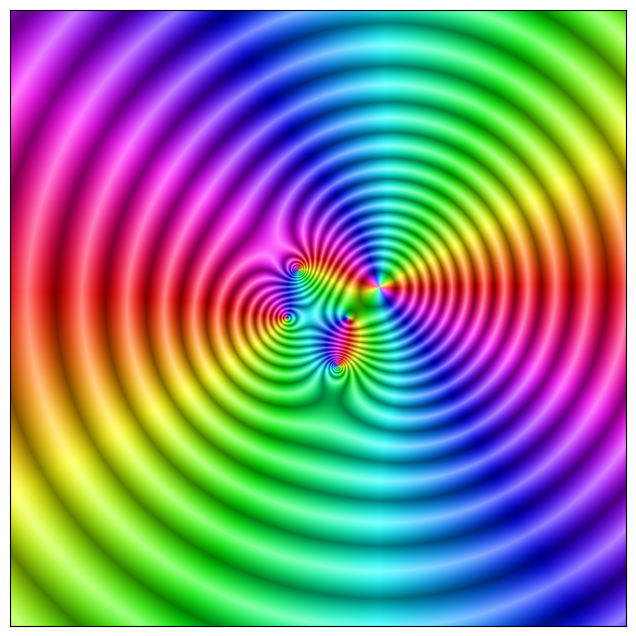

In [9]:
dc.plot(lambda z : ((z**2-1)*(z-2-1j)**2)/(z**2+2+2j))

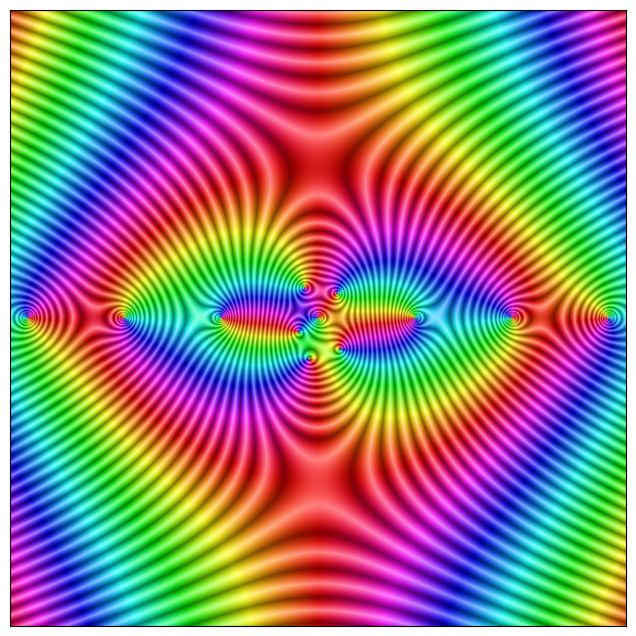

In [11]:
dc.plot(lambda z : (z**5+1j*z**4+z**3+1j*z**2+z+1j+1)/np.sin(z))

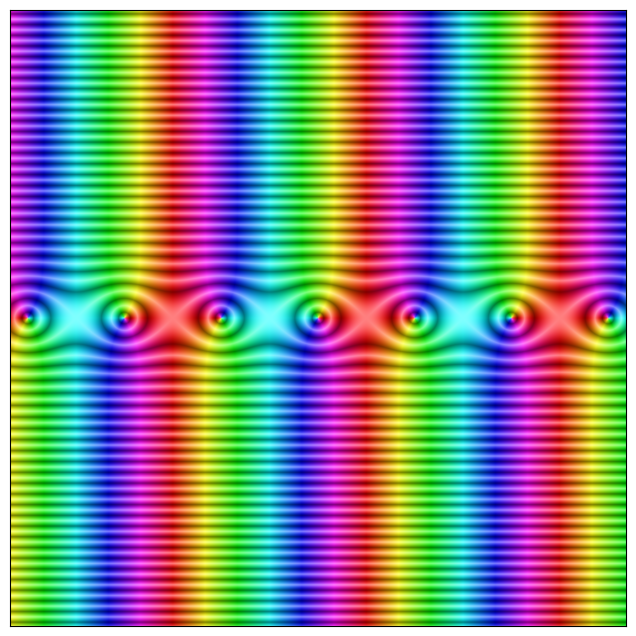

In [14]:
dc.plot(lambda z : np.sin(z))

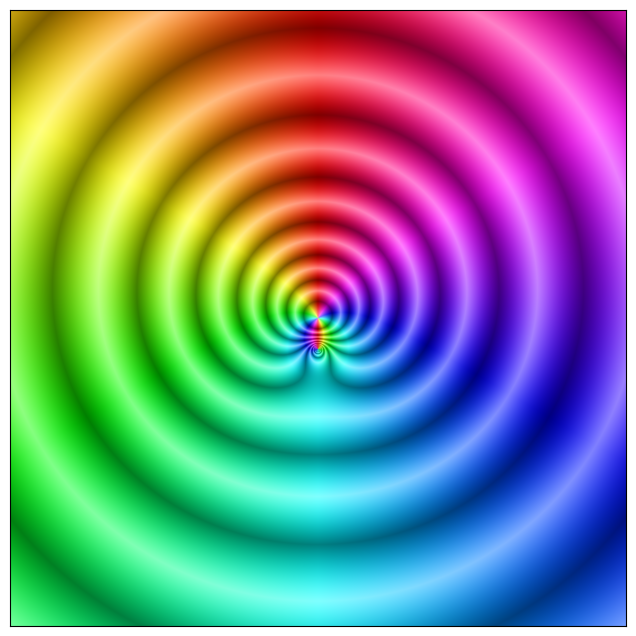

In [15]:
dc.plot(lambda z : (1/(1-1j*z))-(1+1j*z))

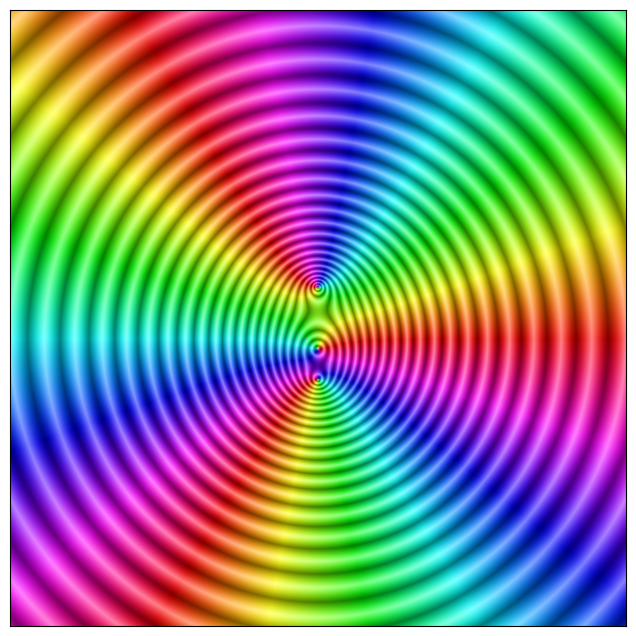

In [19]:
dc.plot(lambda z : z**3+2j*z**2+2j+z)